# Todo
1. Finish code block.
2. Finish experiments and analysis.
3. Upload HW1_name.ipynb to eeclass->homework.

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

#Building environment

In this homework, we are going to implement a 6-armed bandit problem with mean:

$q_*(1)$ |$q_*(2)$ |$q_*(3)$ |$q_*(4)$ |$q_*(5)$ |$q_*(6)$  
:--:|:--:|:--:|:--:|:--:|:--:
0.3|-5|5|-1.1|1|0
<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|

  When you chooce the $n^{th}$ bandit , the reward should be given by a normal distribution with mean $q_∗(n)$ and variance 1.



In [2]:
class bandit:

  # initialize the means and variance of the bandit
  def __init__(self, mean=[0.3, -5, 5, -1.1, 1, 0], variance = 1):
    self.mean = mean
    self.banditNums = len(mean)
    self.variance = variance

  #give a action, recieve a reward
  def step(self, action):

    # where action is the chosen bandit (i.e. action is between 0~5)
    # To return a number from a normal distribution, you might want to call the function rd.normal().
    
    
    ######## your code here ##########

    reward = rd.normal(loc = self.mean[action] , scale = (self.variance**0.5) )

    ######################################

    return reward


#implement learing process

The learning process in this homework is relatively simple:
1. Choose an action:
  
  Generally speaking, it is better to always choose the best option, but in order to keep the exporation going, we sometimes choose random action with a probability of $\epsilon$.

2. Update the action values:

  After receiving the reward, we will update the action value. In this homework we simply use the average reward as the the action value. Try using the following relationship when updating.

  $NewEstimate\leftarrow OleEstimate + StepSize\bigg[Target - OldEstimate\bigg].$

  $Q_{n+1} = Q_{n}+1/n\times\bigg[R_n - Q_n\bigg]$


In [3]:
class learning:


  def __init__(self):
    self.env = bandit()
    self.actionValues = [0,0,0,0,0,0]
    self.chosenTimes = [0,0,0,0,0,0]

  def chooseAction(self, epsilon):
    
    # To generate random numbers, check out rd.random() and rd.randint().
    # And to find the action with maximum value (from self.actionValues), you can use np.argmax().

    ######## your code here ##########
    
    rand_probability = rd.random()

    if rand_probability <= epsilon:
      action = rd.randint(0,5)
    else:
      action = np.argmax(self.actionValues)
    
    ######################################
    return action

  def updateValue(self, action, reward):

    # This is how many times you have chosen this action.

    self.chosenTimes[action] +=1

    # Now, update the action value(self.actionValues[action]) with the average reward of this action.

    ######## your code here ##########

    self.actionValues[action]=self.actionValues[action]+(1/self.chosenTimes[action])*(reward-self.actionValues[action])

    ######################################

  def run(self, epis, epsilon):
    self.actionValues = [10,10,10,10,10,10]
    self.chosenTimes = [0,0,0,0,0,0]
    averageRewards = []
    rewards = []
    for _ in range(epis):
      action = self.chooseAction(epsilon)
      reward = self.env.step(action)
      rewards.append(reward)
      averageRewards.append(np.average(rewards))
      self.updateValue(action, reward)
    
    return rewards, averageRewards

# Test your results (60%)
- you need to get picture looking like following picture.
- We will use 'matplotlib' to visualize the result. For more information, click on the [LINK](https://matplotlib.org/2.0.2/api/pyplot_api.html) to see the documentation or search tutorials online.

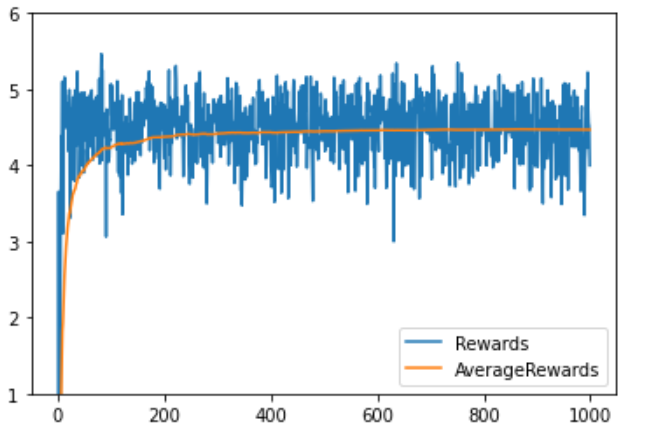

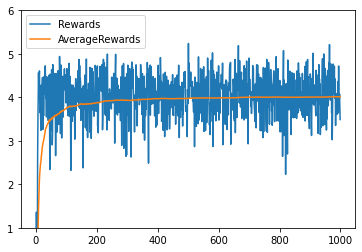

In [4]:
HW1 = learning()

# You might want to modify the following code to get different figure for the report.
rewards_all=[]
averageRewards_all=[]
rd.seed(1)
for i in range(30): 
  rewards, averageRewards = HW1.run(epis = 1000, epsilon = 0.2)
  rewards_all.append(np.array(rewards))  
  averageRewards_all.append(np.array(averageRewards))


plt.figure()
plt.plot(np.average(rewards_all,axis=0),label="Rewards")
plt.plot(np.average(averageRewards_all,axis=0),label="AverageRewards")
plt.legend()
plt.ylim(1,6)
plt.show()


# Experiments and Analysis(40%)

Q1(20%) Get average rewards curves of different settings over 1000 episodes and average the 
result of 30 learning process into a figure.


▪ Vary 𝜀 value with 0, 0.2, 0.8. What happens? Why? Please plot the curves
into a figure.



當𝜀=0時，由於所有策略皆是根據累積報酬Return進行Greedy Action選擇，不含隨機性。因此在幾次動作Action過後，收斂的Average Reward會趨近於最佳選擇的期望收益平均值Reward=5。

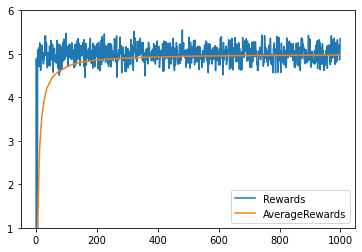

當𝜀=0.2時，80%的機率會根據累積報酬Return進行Greedy Action選擇，含有20%隨機Action選擇。因此相較於𝜀=0時後續都跟隨最佳期望收益Reward的選擇，𝜀=0.2會因為隨機策略選擇到其他期望較低的收益Reward，所以最後收斂的Average Reward會較𝜀=0時有所下降，且因為隨機策略的影響，相較於𝜀=0時Reward與Avearge Reward之間的Variance會更大。

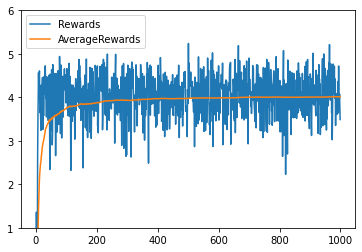

當𝜀=0.8時，20%的機率會根據累積報酬Return進行Greedy Action選擇，有高達80%隨機Action選擇。因此相較於𝜀=2會有更高機率根據隨機策略選擇到其他期望較低的收益Reward，所以最後收斂的Average Reward會較𝜀=2時下降更多。

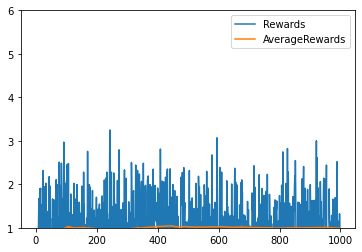

Q2(10%) Is there any way to always get the best result when 𝜀 = 0? How?

若是在已知環境中，相較於未知環境需要隨機策略進行Exploration，已知環境不需要(𝜀=0)，因此只需要根據目前已知參數進行Greedy Action選擇，即可得到最佳結果。

只要初始action-value設定高於所有reward，𝜀 = 0 時，過程中qvalue就會下降到最佳解

Q3(10%)Is there a way to compute the value of convergence?

$透過將選擇機率與各動作收益\,Reward\,平均值相乘，即可預測平均收益最終收斂值\,the\,convergence\,of\,Average\,Reward。\\例如:當\,𝜀=0.2\,時，80\%的機率會根據累積報酬\,Return\,進行\,Greedy\,Action\,選擇，含有20\%隨機\,Action\,選擇。\\透過公式\,0.2\times5\,+\,0.8\times(0.2\times0.3+0.2\times-5+0.2\times-1.1+0.2\times1+0.2\times0)\,=\,3.8\\結果與程式實際模擬計算收斂值\,3.8\,相同。$

$透過公式\,(1-0.2)\times5\,+\,0.2\times(\frac{1}{6}\times0.3+\frac{1}{6}\times-5+\frac{1}{6}\times
5+\frac{1}{6}\times-1.1+\frac{1}{6}\times1+\frac{1}{6}\times0)\,=\,3.94$